In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_stata('../data/suggested_premiums.dta')
df.head()

,index,AGE42X,SEX,REGION42,EMPST42,POVCAT22,INSCOV22,TOTEXP22,predicted_cost,suggested_premium
0,0,77,2 FEMALE,2 MIDWEST,4 NOT EMPLOYED DURING RD 4/2,3 LOW INCOME,2 PUBLIC ONLY,15766,15267.833476,19084.79
1,1,63,2 FEMALE,2 MIDWEST,4 NOT EMPLOYED DURING RD 4/2,1 POOR/NEGATIVE,2 PUBLIC ONLY,12697,11143.446028,13929.31
2,2,67,1 MALE,2 MIDWEST,1 EMPLOYED AT RD 4/2 INT DATE,4 MIDDLE INCOME,2 PUBLIC ONLY,3405,6991.207639,8739.01
3,3,29,1 MALE,4 WEST,1 EMPLOYED AT RD 4/2 INT DATE,5 HIGH INCOME,1 ANY PRIVATE,9265,5384.183938,6730.23
4,4,51,2 FEMALE,1 NORTHEAST,1 EMPLOYED AT RD 4/2 INT DATE,4 MIDDLE INCOME,1 ANY PRIVATE,3362,4703.247548,5879.06


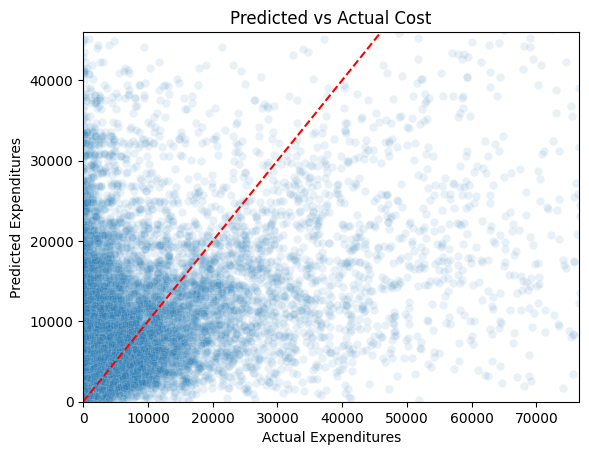

In [15]:
min_value = min(min(df['TOTEXP22']), min(df['predicted_cost']))
max_value = max(max(df['TOTEXP22']), max(df['predicted_cost']))

sns.scatterplot(
    x = 'TOTEXP22',
    y = 'predicted_cost',
    data = df,
    alpha = 0.1
).set(
    xlabel = 'Actual Expenditures',
    ylabel = 'Predicted Expenditures',
    title = 'Predicted vs Actual Cost'
)
plt.plot([min_value, max_value], [min_value, max_value], 'r--')

actual_mean = np.mean(df['TOTEXP22'])
actual_std = np.std(df['TOTEXP22'])
predicted_mean = np.mean(df['predicted_cost'])
predicted_std = np.std(df['predicted_cost'])

plt.xlim(0, actual_mean + 3 * actual_std)
plt.ylim(0, predicted_mean + 3 * predicted_std)
plt.savefig('../visualizations/predicted_vs_actual_cost.png')
plt.show()